In [1]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 22D1-E75F

 Directory of C:\Users\Sree Ram\Desktop\ibm python

21-10-2022  23:51    <DIR>          .
21-10-2022  20:41    <DIR>          ..
21-10-2022  23:51    <DIR>          .ipynb_checkpoints
21-10-2022  23:26       457,840,720 fruit.h5
20-10-2022  15:05             2,137 Image Processing.ipynb
21-10-2022  23:50           220,619 Model Building For Fruit Disease Prediction.ipynb
21-10-2022  23:50                72 Model Building For Vegetable Disease Prediction.ipynb
21-10-2022  22:09           127,962 Test Fruit Prediction Model.ipynb
21-10-2022  22:41           163,095 Test Vegetable Prediction Model.ipynb
20-10-2022  21:19             4,498 test.ipynb
               7 File(s)    458,359,103 bytes
               3 Dir(s)  205,442,408,448 bytes free


In [2]:
pwd

'C:\\Users\\Sree Ram\\Desktop\\ibm python'

# Image Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 22D1-E75F

 Directory of C:\Users\Sree Ram\Desktop\ibm python

21-10-2022  23:52    <DIR>          .
21-10-2022  20:41    <DIR>          ..
21-10-2022  23:51    <DIR>          .ipynb_checkpoints
21-10-2022  23:26       457,840,720 fruit.h5
20-10-2022  15:05             2,137 Image Processing.ipynb
21-10-2022  23:50           220,619 Model Building For Fruit Disease Prediction.ipynb
21-10-2022  23:52             2,969 Model Building For Vegetable Disease Prediction.ipynb
21-10-2022  22:09           127,962 Test Fruit Prediction Model.ipynb
21-10-2022  22:41           163,095 Test Vegetable Prediction Model.ipynb
20-10-2022  21:19             4,498 test.ipynb
               7 File(s)    458,362,000 bytes
               3 Dir(s)  205,440,077,824 bytes free


In [7]:
pwd

'C:\\Users\\Sree Ram\\Desktop\\ibm python'

In [8]:
x_train=train_datagen.flow_from_directory(r"C:\Users\Sree Ram\Desktop\ibm\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [9]:
x_test=test_datagen.flow_from_directory(r'C:\Users\Sree Ram\Desktop\ibm\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set',target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 3416 images belonging to 9 classes.


In [10]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

# CNN

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [12]:
model=Sequential()

In [13]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Flatten())

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


# Hidden Layers

In [17]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

# Output Layer

In [18]:
model.add(Dense(6,activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
len(x_train)

475

In [21]:
1238/24

51.583333333333336

# Saving Model

In [27]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 22D1-E75F

 Directory of C:\Users\Sree Ram\Desktop\ibm python

22-10-2022  00:04    <DIR>          .
21-10-2022  20:41    <DIR>          ..
21-10-2022  23:51    <DIR>          .ipynb_checkpoints
21-10-2022  23:26       457,840,720 fruit.h5
20-10-2022  15:05             2,137 Image Processing.ipynb
21-10-2022  23:50           220,619 Model Building For Fruit Disease Prediction.ipynb
22-10-2022  00:04            14,036 Model Building For Vegetable Disease Prediction.ipynb
21-10-2022  22:09           127,962 Test Fruit Prediction Model.ipynb
21-10-2022  22:41           163,095 Test Vegetable Prediction Model.ipynb
20-10-2022  21:19             4,498 test.ipynb
               7 File(s)    458,373,067 bytes
               3 Dir(s)  204,337,598,464 bytes free


In [28]:
model.save('vegetable.h5')

In [29]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 22D1-E75F

 Directory of C:\Users\Sree Ram\Desktop\ibm python

22-10-2022  00:05    <DIR>          .
21-10-2022  20:41    <DIR>          ..
21-10-2022  23:51    <DIR>          .ipynb_checkpoints
21-10-2022  23:26       457,840,720 fruit.h5
20-10-2022  15:05             2,137 Image Processing.ipynb
21-10-2022  23:50           220,619 Model Building For Fruit Disease Prediction.ipynb
22-10-2022  00:04            14,036 Model Building For Vegetable Disease Prediction.ipynb
21-10-2022  22:09           127,962 Test Fruit Prediction Model.ipynb
21-10-2022  22:41           163,095 Test Vegetable Prediction Model.ipynb
20-10-2022  21:19             4,498 test.ipynb
22-10-2022  00:05       457,840,720 vegetable.h5
               8 File(s)    916,213,787 bytes
               3 Dir(s)  203,879,526,400 bytes free


# Test The Model

In [30]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('vegetable.h5')

In [32]:
img=image.load_img(r"C:\Users\Sree Ram\Desktop\ibm\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Pepper,_bell___Bacterial_spot\ad921dec-e88f-41d8-9455-0880c69063fc___NREC_B.Spot 9216.JPG")

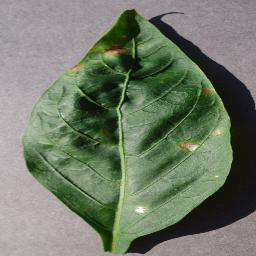

In [33]:
img

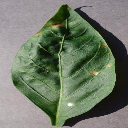

In [34]:
img=image.load_img(r"C:\Users\Sree Ram\Desktop\ibm\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Pepper,_bell___Bacterial_spot\ad921dec-e88f-41d8-9455-0880c69063fc___NREC_B.Spot 9216.JPG",target_size=(128,128))
img

In [35]:
x=image.img_to_array(img)

In [36]:
x

array([[[157., 150., 157.],
        [155., 148., 155.],
        [157., 150., 157.],
        ...,
        [138., 131., 138.],
        [135., 128., 135.],
        [134., 127., 134.]],

       [[157., 150., 157.],
        [159., 152., 159.],
        [158., 151., 158.],
        ...,
        [141., 134., 141.],
        [137., 130., 137.],
        [135., 128., 135.]],

       [[165., 158., 165.],
        [167., 160., 167.],
        [166., 159., 166.],
        ...,
        [138., 131., 138.],
        [136., 129., 136.],
        [138., 131., 138.]],

       ...,

       [[176., 170., 170.],
        [174., 168., 168.],
        [176., 170., 170.],
        ...,
        [138., 126., 128.],
        [141., 129., 131.],
        [146., 134., 136.]],

       [[177., 171., 171.],
        [178., 172., 172.],
        [176., 170., 170.],
        ...,
        [144., 132., 134.],
        [151., 139., 141.],
        [137., 125., 127.]],

       [[180., 174., 174.],
        [180., 174., 174.],
        [176., 1

In [37]:
x=np.expand_dims(x,axis=0)

In [38]:
x

array([[[[157., 150., 157.],
         [155., 148., 155.],
         [157., 150., 157.],
         ...,
         [138., 131., 138.],
         [135., 128., 135.],
         [134., 127., 134.]],

        [[157., 150., 157.],
         [159., 152., 159.],
         [158., 151., 158.],
         ...,
         [141., 134., 141.],
         [137., 130., 137.],
         [135., 128., 135.]],

        [[165., 158., 165.],
         [167., 160., 167.],
         [166., 159., 166.],
         ...,
         [138., 131., 138.],
         [136., 129., 136.],
         [138., 131., 138.]],

        ...,

        [[176., 170., 170.],
         [174., 168., 168.],
         [176., 170., 170.],
         ...,
         [138., 126., 128.],
         [141., 129., 131.],
         [146., 134., 136.]],

        [[177., 171., 171.],
         [178., 172., 172.],
         [176., 170., 170.],
         ...,
         [144., 132., 134.],
         [151., 139., 141.],
         [137., 125., 127.]],

        [[180., 174., 174.],
       

In [39]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 92ms/step


In [40]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [41]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']


In [42]:
index[y[0]]

'Potato___Late_blight'

In [46]:
img=image.load_img(r"C:\Users\Sree Ram\Desktop\ibm\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Tomato___Septoria_leaf_spot\c551c562-b93a-4b2e-9058-12519414b3ff___Matt.S_CG 2882.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 25ms/step


'Potato___Late_blight'